# Loading and preprocessing

In [5]:
import pandas as pd
"""
Load the dataset from a CSV file and print the first few rows.
Parameters:
- None
Returns:
- None
"""
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = pd.read_csv('../data/dataset.csv')
print(dataset.head())

   schoolid  Z         Y  S3  C1  C2  C3  XC        X1        X2        X3  \
0        76  1  0.081602   6   4   2   1   4  0.334544  0.648586 -1.310927   
1        76  1 -0.385869   4  12   2   1   4  0.334544  0.648586 -1.310927   
2        76  1  0.398184   6   4   2   0   4  0.334544  0.648586 -1.310927   
3        76  1 -0.175037   6   4   2   0   4  0.334544  0.648586 -1.310927   
4        76  1  0.884583   6   4   1   0   4  0.334544  0.648586 -1.310927   

         X4        X5  
0  0.224077 -0.426757  
1  0.224077 -0.426757  
2  0.224077 -0.426757  
3  0.224077 -0.426757  
4  0.224077 -0.426757  


In [6]:
# Columns are renamed to more descriptive names for clarity.
"""
Rename the columns of the dataset to more descriptive names for clarity.

Parameters:
- dataset (pandas.DataFrame): The original dataset.

Returns:
- pandas.DataFrame: The dataset with renamed columns.
"""
data = dataset.rename(columns={
        'Y': 'StudentAchievementScore',
        'Z': 'GrowthMindsetIntervention',
        'S3': 'FutureSuccessExpectations',
        'C1': 'StudentRaceEthnicity',
        'C2': 'StudentGender',
        'C3': 'FirstGenCollegeStatus',
        'XC': 'SchoolUrbanicity',
        'X1': 'PreInterventionFixedMindset',
        'X2': 'SchoolAchievementLevel',
        'X3': 'SchoolMinorityComposition',
        'X4': 'PovertyConcentration',
        'X5': 'TotalStudentPopulation'
    })

In [4]:
# Define covariates, treatment, and outcome
"""
Define covariates, treatment, and outcome.

Parameters:
- covariate_cols (list): A list of column names representing the covariates.
- treatment_col (str): The column name representing the treatment variable.
- outcome_col (str): The column name representing the outcome variable.
"""
covariate_cols = ['S3', 'C1', 'C2', 'C3', 'XC', 'X1', 'X2', 'X3', 'X4', 'X5']
treatment_col = 'Z'
outcome_col = 'Y'

# Split train and test data

In [7]:
# Split the data into training and testing sets
"""
Split the dataset into training and testing sets.

Parameters:
- dataset (pandas DataFrame): The dataset to be split.
- test_size (float): The proportion or number of samples to be included in the testing set.
- random_state (int, optional): Seed for the random number generator. Default is None.
- stratify (pandas Series or array-like, optional): The variable used for stratification. Default is None.

Returns:
- train_data (pandas DataFrame): The training set.
- test_data (pandas DataFrame): The testing set.
"""
# stratification to ensure that the proportion of treated and control individuals in Z is maintained in both training and test sets
train_data, test_data = train_test_split(dataset, test_size=0.3, random_state=42, stratify=dataset[treatment_col])


# Standardizing the Covariates


Standardizing the Covariates
The covariates (independent variables) are standardized to ensure that they are on a similar scale. Standardization is a preprocessing technique where each feature is transformed to have a mean of 0 and a standard deviation of 1. This is particularly important because covariates can vary widely in their ranges and units; some may span from 0 to 1000, while others might only vary between 0 and 1. If these variables are not standardized, those with larger ranges could disproportionately influence the model, leading to biased results.

To standardize the data, the code uses StandardScaler from Scikit-Learn’s preprocessing module. The scaler first calculates the mean and standard deviation of each covariate using the training data. It then applies these statistics to transform both the training and testing data. The training data is transformed using fit_transform, which both calculates the necessary statistics and applies the transformation. The testing data is transformed using transform, which ensures that the same scaling applied to the training data is also applied to the testing data, preserving consistency.

In [9]:
scaler = StandardScaler()

# Using .loc[] to ensure you're explicitly modifying the DataFrame
train_data.loc[:, covariate_cols] = scaler.fit_transform(train_data.loc[:, covariate_cols].values)
test_data.loc[:, covariate_cols] = scaler.transform(test_data.loc[:, covariate_cols].values)


# parameter grid for each model

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR

In [11]:
# Define the parameter grid for each model
param_grids = {
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'NeuralNetwork': {
        'model': MLPRegressor(max_iter=500),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (100, 100)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam', 'sgd']
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0, 10.0]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.1, 1.0, 10.0]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'rbf'],
            'C': [0.1, 1.0, 10.0],
            'epsilon': [0.1, 0.2, 0.5]
        }
    },
    'ExtraTrees': {
        'model': ExtraTreesRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'AdaBoost': {
        'model': AdaBoostRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
}

# Grid Search CV

In [1]:
import numpy as np
def grid_search_cv(data, treatment_col, outcome_col, covariate_cols, model, params, meta_learner):
    """
    Perform GridSearchCV for hyperparameter tuning and return the best model.
    """
    X = data[covariate_cols + [treatment_col]]
    y = data[outcome_col]

    scoring_metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring=scoring_metrics, refit='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X, y)

    # Get the best parameters and best model
    best_model = grid_search.best_estimator_  # The best model found
    best_params = grid_search.best_params_    # The parameters that led to the best model
    best_score_mse = -grid_search.best_score_  # Convert back to positive MSE
    
    # Get the best MAE and R²
    best_mae = -grid_search.cv_results_['mean_test_neg_mean_absolute_error'][grid_search.best_index_]
    best_r2 = grid_search.cv_results_['mean_test_r2'][grid_search.best_index_]
    
    # Print the best parameters and corresponding metrics
    print(f"Best parameters for {meta_learner} with {model.__class__.__name__}: {best_params}")
    print(f"Best MSE: {best_score_mse:.4f}, Best MAE: {best_mae:.4f}, Best R²: {best_r2:.4f}")
    
    # Return the best model (estimator) and the evaluation metrics
    return best_model, best_score_mse, best_mae, best_r2


# Meta-Learners

## s-Learner

In [13]:
def s_learner(data, treatment_col, outcome_col, covariate_cols, model):
    """
    Train an S-learner model to estimate CATE.
    """
    X = data[covariate_cols + [treatment_col]]
    y = data[outcome_col]
    model.fit(X, y)
    return model

In [14]:
def t_learner(data, treatment_col, outcome_col, covariate_cols, model):
    """
    Train a T-learner model to estimate CATE.
    """
    treated = data[data[treatment_col] == 1]
    control = data[data[treatment_col] == 0]
    X_treated = treated[covariate_cols]
    y_treated = treated[outcome_col]
    X_control = control[covariate_cols]
    y_control = control[outcome_col]
    model_treated = model.fit(X_treated, y_treated)
    model_control = model.fit(X_control, y_control)
    return model_treated, model_control

In [15]:
def x_learner(data, treatment_col, outcome_col, covariate_cols, model):
    """
    Train an X-learner model to estimate CATE.
    """
    treated = data[data[treatment_col] == 1]
    control = data[data[treatment_col] == 0]
    X_treated = treated[covariate_cols]
    y_treated = treated[outcome_col]
    X_control = control[covariate_cols]
    y_control = control[outcome_col]
    model_treated = model.fit(X_treated, y_treated)
    model_control = model.fit(X_control, y_control)
    treated_outcome = model_control.predict(X_treated)
    control_outcome = model_treated.predict(X_control)
    treatment_effect_treated = y_treated - treated_outcome
    treatment_effect_control = control_outcome - y_control
    model_treatment_effect_treated = model.fit(X_treated, treatment_effect_treated)
    model_treatment_effect_control = model.fit(X_control, treatment_effect_control)
    return model_treatment_effect_treated, model_treatment_effect_control

In [16]:
from sklearn.linear_model import  LassoCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
import numpy as np

def r_learner(data, treatment_col, outcome_col, covariate_cols, model):
    """
    Train an improved R-learner model to estimate CATE with robust residual handling and regularization.
    
    Parameters:
    - data: DataFrame containing the data
    - treatment_col: Column name for the treatment variable
    - outcome_col: Column name for the outcome variable
    - covariate_cols: List of column names for covariates
    - model: The base model to be used for predicting outcomes and treatment
    - regularization: Type of regularization to use ('ridge' or 'lasso')
    
    Returns:
    - tau_model: The trained model for estimating treatment effects
    - y_model: The outcome model
    - t_model: The treatment model
    - y_residual: Residuals of the outcome model
    - t_residual: Residuals of the treatment model
    """
    X = data[covariate_cols]
    T = data[treatment_col]
    y = data[outcome_col]

    # Fit outcome model
    y_model = cross_val_predict(model, X, y, cv=5)
    
    # Fit treatment model
    t_model = cross_val_predict(model, X, T, cv=5)
    
    # Calculate residuals
    y_residual = y - y_model
    t_residual = T - t_model
    
    # Regularization of residuals
    t_residual_clipped = np.clip(t_residual, a_min=0.01, a_max=None)
    y_residual = (y_residual - np.mean(y_residual)) / np.std(y_residual)
    t_residual_clipped = (t_residual_clipped - np.mean(t_residual_clipped)) / np.std(t_residual_clipped)
    
    # Add a small constant to prevent division by zero
    epsilon = 1e-3 * np.std(t_residual)
    t_residual_regularized = t_residual_clipped + epsilon
    
#     # Use LassoCV for additional regularization in the final model
    tau_model = LassoCV(alphas=[0.1, 1.0, 10.0])
    
    
    # Fit the treatment effect model
    tau_model.fit(X, y_residual / t_residual_regularized)
    
    return tau_model, y_model, t_model, y_residual, t_residual


# Evaluate model

In [17]:
from sklearn.utils import resample

def evaluate_emse(data, treatment_col, outcome_col, covariate_cols, model, meta_learner, n_bootstraps=100, n_splits=5):
    """
    Evaluate the model using bootstrapping to approximate the EMSE.
    
    n_bootstraps: Number of bootstrap samples to generate
    n_splits: Number of folds in cross-validation (for the inner MSE calculation)
    """
    mse_list = []
    
    for _ in range(n_bootstraps):
        # Create a bootstrapped sample
        bootstrapped_data = resample(data, replace=True)
        
        # Evaluate the model using cross-validation on the bootstrapped sample
        X = bootstrapped_data[covariate_cols + [treatment_col]]
        y = bootstrapped_data[outcome_col]
        
        if meta_learner == 's':
            predictions = model.predict(X)
        elif meta_learner == 't':
            treated, control = model
            predictions_treated = treated.predict(bootstrapped_data[bootstrapped_data[treatment_col] == 1][covariate_cols])
            predictions_control = control.predict(bootstrapped_data[bootstrapped_data[treatment_col] == 0][covariate_cols])
            predictions = pd.concat([pd.Series(predictions_treated), pd.Series(predictions_control)], ignore_index=True)
        elif meta_learner == 'x':
            treated, control = model
            predictions_treated = treated.predict(bootstrapped_data[bootstrapped_data[treatment_col] == 1][covariate_cols])
            predictions_control = control.predict(bootstrapped_data[bootstrapped_data[treatment_col] == 0][covariate_cols])
            predictions = pd.concat([pd.Series(predictions_treated), pd.Series(predictions_control)], ignore_index=True)
        elif meta_learner == 'r':
            tau_model, _, _, _, _ = model
            predictions = tau_model.predict(bootstrapped_data[covariate_cols])
        
        mse = mean_squared_error(y, predictions)
        mse_list.append(mse)
    
    # Calculate the EMSE as the mean of the MSEs from the bootstrapped samples
    emse = np.mean(mse_list)
    return emse


# Find Baset parameters for each model

## S-Learner

In [18]:
from sklearn.metrics import mean_squared_error
emse_results = []

for model_name, config in param_grids.items():
    best_model, best_mse, best_mae, best_r2  = grid_search_cv(train_data, treatment_col, outcome_col, covariate_cols, config['model'], config['params'], 'S-Learner')
    s_model = s_learner(train_data, treatment_col, outcome_col, covariate_cols, best_model)
    emse_s = evaluate_emse(test_data, treatment_col, outcome_col, covariate_cols, s_model, 's')
    emse_results.append({'Meta-Learner': 'S-Learner', 'Model': model_name, 'EMSE': emse_s,'MSE': best_mse, 'MAE': best_mae, 'R²': best_r2})

    best_model, best_mse, best_mae, best_r2  = grid_search_cv(train_data, treatment_col, outcome_col, covariate_cols, config['model'], config['params'], 'T-Learner')
    t_model_treated, t_model_control = t_learner(train_data, treatment_col, outcome_col, covariate_cols, best_model)
    emse_t = evaluate_emse(test_data, treatment_col, outcome_col, covariate_cols, (t_model_treated, t_model_control), 't')
    emse_results.append({'Meta-Learner': 'T-Learner', 'Model': model_name, 'EMSE': emse_t,'MSE': best_mse, 'MAE': best_mae, 'R²': best_r2})

    best_model, best_mse, best_mae, best_r2  = grid_search_cv(train_data, treatment_col, outcome_col, covariate_cols, config['model'], config['params'], 'X-Learner')
    x_model_treated, x_model_control = x_learner(train_data, treatment_col, outcome_col, covariate_cols, best_model)
    emse_x = evaluate_emse(test_data, treatment_col, outcome_col, covariate_cols, (x_model_treated, x_model_control), 'x')
    emse_results.append({'Meta-Learner': 'X-Learner', 'Model': model_name, 'EMSE': emse_x,'MSE': best_mse, 'MAE': best_mae, 'R²': best_r2})

    best_model, best_mse, best_mae, best_r2  = grid_search_cv(train_data, treatment_col, outcome_col, covariate_cols, config['model'], config['params'], 'R-Learner')
    r_model, y_model, t_model, y_residual, t_residual = r_learner(train_data, treatment_col, outcome_col, covariate_cols, best_model)
    emse_r = evaluate_emse(test_data, treatment_col, outcome_col, covariate_cols, (r_model, y_model, t_model, y_residual, t_residual), 'r')
    emse_results.append({'Meta-Learner': 'R-Learner', 'Model': model_name, 'EMSE': emse_r,'MSE': best_mse, 'MAE': best_mae, 'R²': best_r2})

emse_df = pd.DataFrame(emse_results)


Best parameters for S-Learner with RandomForestRegressor: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best MSE: 0.2838, Best MAE: 0.4230, Best R²: 0.3240
Best parameters for T-Learner with RandomForestRegressor: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best MSE: 0.2842, Best MAE: 0.4231, Best R²: 0.3230
Best parameters for X-Learner with RandomForestRegressor: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best MSE: 0.2837, Best MAE: 0.4230, Best R²: 0.3242
Best parameters for R-Learner with RandomForestRegressor: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best MSE: 0.2838, Best MAE: 0.4231, Best R²: 0.3239
Best parameters for S-Learner with GradientBoostingRegressor: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best MSE: 0.2666, Best MAE: 0.4105, Best R²: 0.3650
Best parameters for T-Learner with GradientBoostingRegressor: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best MSE

## Plot the EMSE Results


   Meta-Learner             Model      EMSE       MSE       MAE        R²
0     S-Learner      RandomForest  0.268901  0.283907  0.422882  0.323649
1     T-Learner      RandomForest  0.543092  0.284122  0.423043  0.323139
2     X-Learner      RandomForest  0.414925  0.284056  0.423186  0.323304
3     R-Learner      RandomForest  0.512292  0.283540  0.422495  0.324530
4     S-Learner  GradientBoosting  0.253771  0.266566  0.410469  0.364994
5     T-Learner  GradientBoosting  0.544480  0.266539  0.410476  0.365058
6     X-Learner  GradientBoosting  0.413713  0.266556  0.410453  0.365018
7     R-Learner  GradientBoosting  0.513486  0.266565  0.410482  0.364996
8     S-Learner     NeuralNetwork  0.268323  0.279761  0.421280  0.333440
9     T-Learner     NeuralNetwork  0.528934  0.280659  0.422288  0.331345
10    X-Learner     NeuralNetwork  0.407816  0.280296  0.421673  0.332199
11    R-Learner     NeuralNetwork  0.508531  0.279597  0.421596  0.333701
12    S-Learner             Ridge  0.2

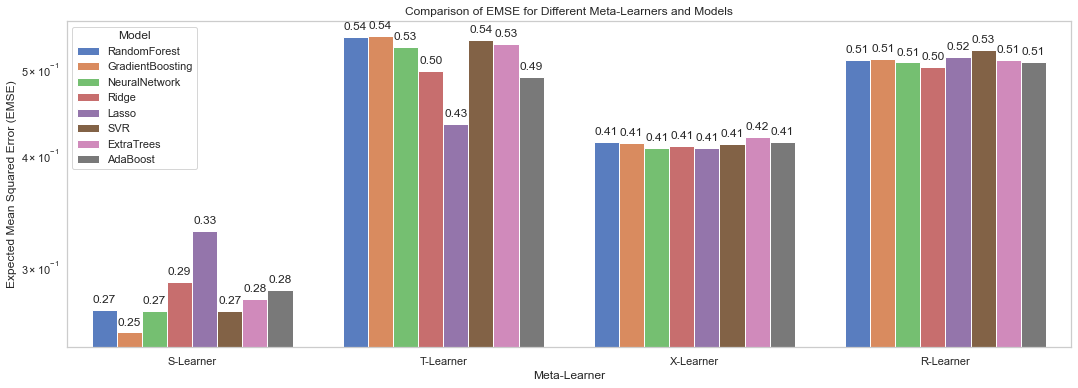

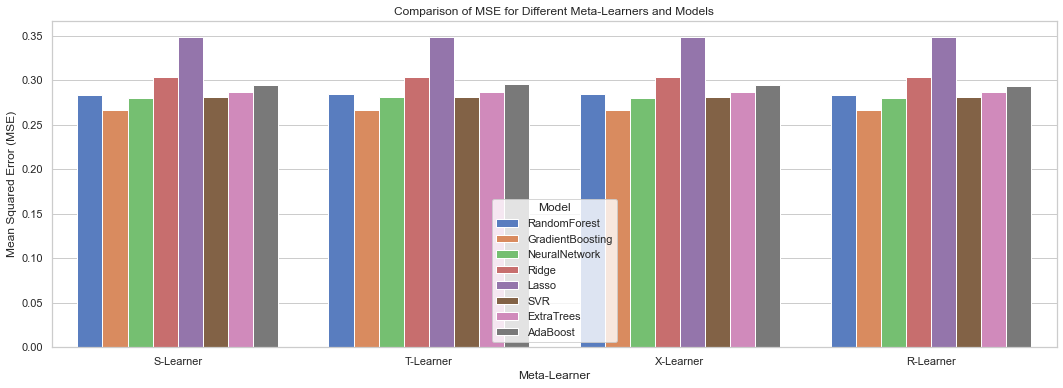

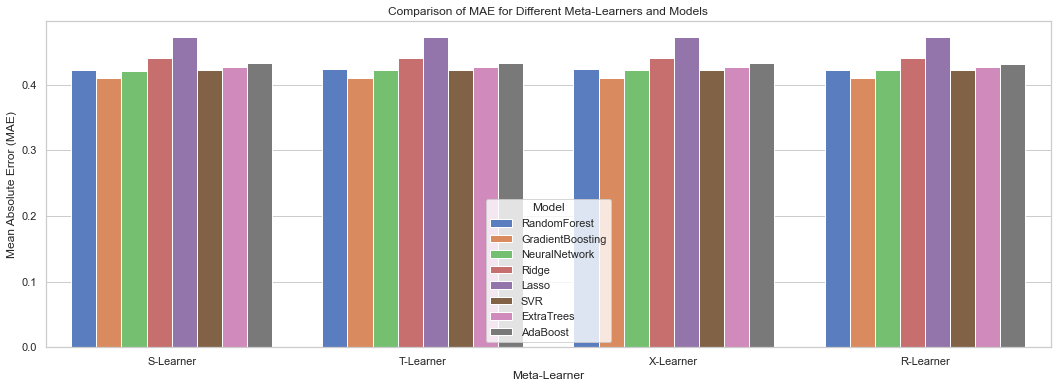

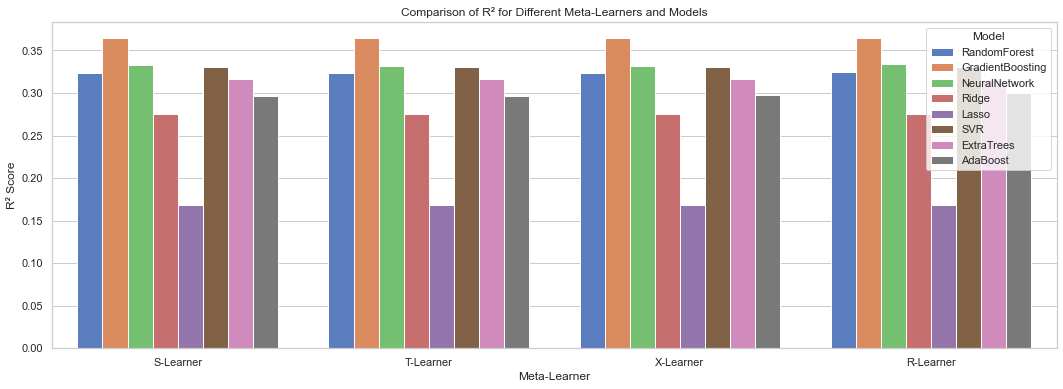

In [16]:
print(emse_df)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(18, 6))
ax = sns.barplot(x='Meta-Learner', y='EMSE', hue='Model', data=emse_df, palette="muted")
plt.title('Comparison of EMSE for Different Meta-Learners and Models')
plt.xlabel('Meta-Learner')
plt.ylabel('Expected Mean Squared Error (EMSE)')
plt.legend(title='Model')
plt.yscale('log')

# Adding the numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

# Plot MSE for different Meta-Learners and Models
plt.figure(figsize=(18, 6))
sns.barplot(x='Meta-Learner', y='MSE', hue='Model', data=emse_df, palette="muted")
plt.title('Comparison of MSE for Different Meta-Learners and Models')
plt.xlabel('Meta-Learner')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend(title='Model')
plt.show()

# Plot MAE for different Meta-Learners and Models
plt.figure(figsize=(18, 6))
sns.barplot(x='Meta-Learner', y='MAE', hue='Model', data=emse_df, palette="muted")
plt.title('Comparison of MAE for Different Meta-Learners and Models')
plt.xlabel('Meta-Learner')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend(title='Model')
plt.show()

# Plot R² for different Meta-Learners and Models
plt.figure(figsize=(18, 6))
sns.barplot(x='Meta-Learner', y='R²', hue='Model', data=emse_df, palette="muted")
plt.title('Comparison of R² for Different Meta-Learners and Models')
plt.xlabel('Meta-Learner')
plt.ylabel('R² Score')
plt.legend(title='Model')
plt.show()